## Loading dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

## Value counts for ham and spam

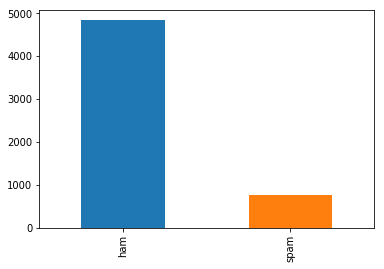

In [3]:
valueCounts = df['v1'].value_counts()
valueCounts.plot(kind = 'bar')
plt.show()

In [4]:
count1 = Counter(" ".join(df[df['v1']=='ham']["v2"]).split()).most_common(20)
df1 = pd.DataFrame(count1)
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})
count2 = Counter(" ".join(df[df['v1']=='spam']["v2"]).split()).most_common(20)
df2 = pd.DataFrame(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count_"})

### Plotting most frequent words

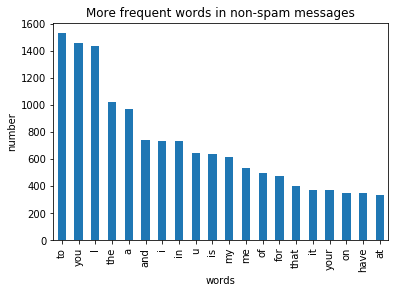

In [5]:
df1.plot.bar(legend = False)
y_pos = np.arange(len(df1["words in non-spam"]))
plt.xticks(y_pos, df1["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

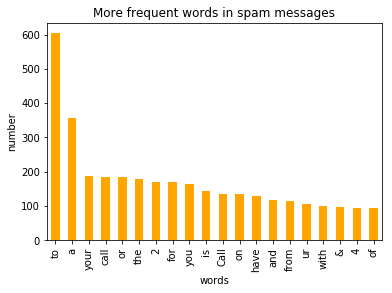

In [6]:
df2.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df2["words in spam"]))
plt.xticks(y_pos, df2["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [7]:
def classification_metrics(actual, pred, msg):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    cm = confusion_matrix(actual, pred)

    plt.figure()
    ax= plt.subplot()
    sns.heatmap(cm, annot = True, fmt = 'g')

    # labels, title and ticks
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['ham', 'spam']) 
    ax.yaxis.set_ticklabels(['ham', 'spam'])   
    plt.show()       
    sensitivity = cm[1][1]/(cm[1][0] + cm[1][1])
    specifity = cm[0][0]/(cm[0][0] + cm[0][1])
    accuracy = (cm[0][0] + cm[1][1]) / np.sum(cm)
    
    print(msg, '\n')
    print('accuracy:    ', round(accuracy,2), 
      '\nsensitivity: ', round(sensitivity,2), 
      '\nspecifity:   ', round(specifity,2))

## Using count vectorizer

In [8]:
vectorizer = feature_extraction.text.CountVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(df["v2"])
np.shape(X)

(5572, 8404)

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, df['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


### Hyper parameter tuning

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV

classifier = naive_bayes.MultinomialNB()
parameters = {'alpha':[0.01, 0.1, 0.5, 1, 2, 5]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_log_loss',
                           cv = 3)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [11]:
best_accuracy 
best_parameters

{'alpha': 1}

In [12]:
bayes = naive_bayes.MultinomialNB(alpha = 0.5)
bayes.fit(X_train, y_train)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

### Results

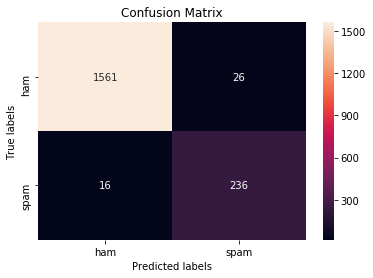

 

accuracy:     0.98 
sensitivity:  0.94 
specifity:    0.98


In [13]:
classification_metrics(y_test, bayes.predict(X_test), msg = '')

### Using TF-IDF vectorizer

In [14]:
vectorizer = feature_extraction.text.TfidfVectorizer(stop_words = 'english')
X = vectorizer.fit_transform(df["v2"])
np.shape(X)

(5572, 8404)

In [15]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, df['v1'], test_size=0.33, random_state=42)
print([np.shape(X_train), np.shape(X_test)])

[(3733, 8404), (1839, 8404)]


### Hyper parameter tuning

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import GridSearchCV

classifier = naive_bayes.MultinomialNB()
parameters = {'alpha':[0.01, 0.1, 0.5, 1, 2, 5]}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_log_loss',
                           cv = 3)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [17]:
best_accuracy 
best_parameters

{'alpha': 0.01}

In [18]:
bayes = naive_bayes.MultinomialNB(alpha = 0.5)
bayes.fit(X_train, y_train)

MultinomialNB(alpha=0.5, class_prior=None, fit_prior=True)

### Evaluation metrics

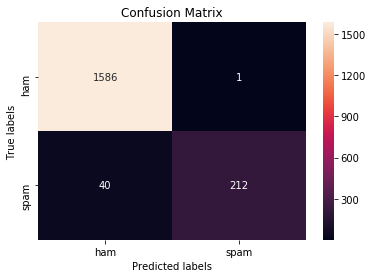

 

accuracy:     0.98 
sensitivity:  0.84 
specifity:    1.0


In [19]:
classification_metrics(y_test, bayes.predict(X_test), msg = '')

### Testing out single message

In [20]:
test = vectorizer.transform(['URGENT! You have won a 1 week FREE ML course'])
bayes.predict(test)

array(['ham'], dtype='<U4')

### Findings
- We can see the drop of sensitivity or recall.
- Although the accuracy is still the same.
- Which proves that accuracy can be very misleading.

### Conclusion
- Count vectorization performs better in our case than TF-IDF. 